# FINSCOPE PROJECT

## Data Understanding 
 Defining the Question 
 
a) Specifying the Data Analytic Question


How to predict which individials are likely to have or use a bank account?

b) Defining the Metric for Success
Be able to correctly determine the number of principal components that should be used in building the final model
To clean the data enough to find the correct Bivariate and multivariate analysis.


c) Understanding the context

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the improvement of mobile banking services of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services.

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

The reaserch conducted here is to find the correct individual financial inclusion statistic in the East Africa region. 

**d**) **Recording the experimental design**


CRISP DM methodology was used in this analysis. The steps included in business understanding include:



*   Business Understanding
*   Data Understanding
*   Analysis
*   Recomendation 
*   Evaluation



# 1.0 Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print ("Libraries Imported Successfully")

Libraries Imported Successfully


# Load the Dataset.

There are two datasets that we have been given to work on. The first is the financial data and the socind one is the description.

In [3]:
# First Dataset
Dataset = 'http://bit.ly/FinancialDataset' 
financial_df = pd.read_csv(Dataset)

# Second Dataset
Variable  =  'http://bit.ly/VariableDefinitions'
variable_definitions = pd.read_csv(Variable)

In [4]:
# Preview the first Dataset
financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Preview the second database
variable_definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


In [6]:
# Investigating the dataset
financial_df.shape

(23524, 13)

In [7]:
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [8]:
# finding how much unique entries each field has
print(financial_df.nunique())

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64


## Data Cleaning

In [9]:
# renaming columns
financial_df.rename(columns = {
    'Has a Bank account': 'account_holder',
    'Type of Location': 'location_type',
    'Cell Phone Access': 'cell_phone_access',
    'Respondent Age': 'age',
    'gender_of_respondent':'gender',
     'The relathip with head': 'relationship_with_head',
     'Level of Educuation': 'education_level',
     'Type of Job': 'job'}, inplace = True)

In [10]:
financial_df.columns

Index(['country', 'year', 'uniqueid', 'account_holder', 'location_type',
       'cell_phone_access', 'household_size', 'age', 'gender',
       'relationship_with_head', 'marital_status', 'education_level', 'job'],
      dtype='object')

In [11]:
financial_df.shape

(23524, 13)

In [12]:
#droping the unique ID column
financial_df.drop('uniqueid', axis = 1, inplace= True)

In [13]:
# check for missing values. 
financial_df.isna().sum()

country                   14
year                       0
account_holder            36
location_type             15
cell_phone_access         11
household_size            28
age                       34
gender                    34
relationship_with_head     4
marital_status            32
education_level           29
job                       30
dtype: int64

In [14]:
# drop all the rows with missing values
financial_df.dropna(inplace = True)
print('The null values have been dropped successfully')

The null values have been dropped successfully


In [15]:
#confirm that there are no missing values
financial_df.isna().sum()


country                   0
year                      0
account_holder            0
location_type             0
cell_phone_access         0
household_size            0
age                       0
gender                    0
relationship_with_head    0
marital_status            0
education_level           0
job                       0
dtype: int64

In [16]:
#check the data typpes
financial_df.dtypes

country                    object
year                        int64
account_holder             object
location_type              object
cell_phone_access          object
household_size            float64
age                       float64
gender                     object
relationship_with_head     object
marital_status             object
education_level            object
job                        object
dtype: object

The year column should be  datetime column. 
Converting the column to date and time should be the next step

In [17]:
# convert the year column to datetime 
financial_df['year'] = pd.to_datetime(financial_df['year'], format='%Y')
financial_df.dtypes

country                           object
year                      datetime64[ns]
account_holder                    object
location_type                     object
cell_phone_access                 object
household_size                   float64
age                              float64
gender                            object
relationship_with_head            object
marital_status                    object
education_level                   object
job                               object
dtype: object

## Outliers and Anomalies 

100.0
16.0


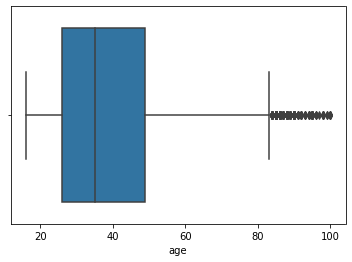

In [18]:
# outliers in the age column. 

# plt.boxplot(financial_df['age'], )
sns.boxplot (x = financial_df['age'])

max_age = financial_df['age'].max()
min_age = financial_df['age'].min()

print (max_age)
print (min_age)

From the analysis, it is clear that the oldest respondent is 100 years and the youngest respondent is i6 years. 100 year plausible therefore, we will not be removing the ouliers. 

21.0
0.0


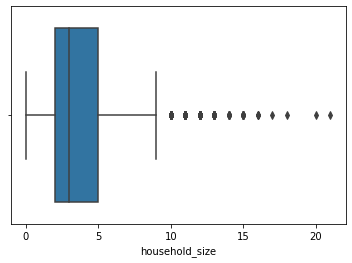

In [19]:
#outliers in the household column
sns.boxplot (x = financial_df['household_size'])
max_house = financial_df['household_size'].max()
min_house = financial_df['household_size'].min()

print (max_house)
print (min_house)

The maximum household size is 21 which can be plausible. However the minimum household size is 0 which is an anomaly. Which has to be removed


In [20]:
# remove anomaly in household

print ('old shape: ', financial_df.shape )
financial_df = financial_df.loc[financial_df['household_size'] != 0]
print ('new shape: ', financial_df.shape )


old shape:  (23343, 12)
new shape:  (23307, 12)


In [21]:
#year 
financial_df['year'].unique()

array(['2018-01-01T00:00:00.000000000', '2029-01-01T00:00:00.000000000',
       '2056-01-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2039-01-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

From the documentation we know that the data in the dataframe was recorded for three years (2016, 2017, and 2018). Therefore the rest of the data is an anomaly. Removing the anomaly is the next step.


In [22]:
#Removing oultiers in the year column
print ('old shape: ', financial_df.shape )
financial_df = financial_df.loc[financial_df['year'] <= '2019']
print ('new shape: ', financial_df.shape )


old shape:  (23307, 12)
new shape:  (23304, 12)


In [23]:
# Cleaning up the Level of Education column

financial_df['education_level'] = financial_df['education_level'].str.replace('6','Other/Dont know/RTA' )
# check if the 6 in the column is gone 
financial_df['education_level'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

# Eploratory Data Analysis

## Univariate Data Analysis

### Categorical Data

In [24]:
# country
#how many countries are in the dataset.
financial_df['country'].value_counts()



Rwanda      8683
Tanzania    6464
Kenya       6062
Uganda      2095
Name: country, dtype: int64

The country that contributed to most of the data in the dataframe is Rwanda

In [25]:
# Gender
financial_df['gender'].value_counts()


Female    13740
Male       9564
Name: gender, dtype: int64

There were more Females interviwed for this dataset than males.

In [26]:
financial_df['year'].value_counts()

2016-01-01    8683
2018-01-01    8157
2017-01-01    6464
Name: year, dtype: int64

Most of the data was collected in 2016

No     20009
Yes     3295
Name: account_holder, dtype: int64


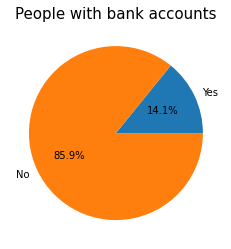

In [27]:
financial_df['account_holder'].value_counts()
labl = financial_df['account_holder'].unique()
plt.pie(financial_df['account_holder'].value_counts().sort_values(), labels=labl, autopct='%1.1f%%' )
plt.title('People with bank accounts', fontsize = 15)
print (financial_df['account_holder'].value_counts())

Majority of the respondents do not have a bank account

Yes    17319
No      5985
Name: cell_phone_access, dtype: int64


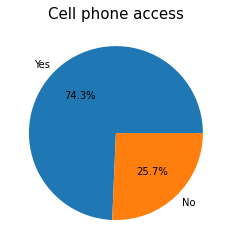

In [28]:
financial_df['cell_phone_access'].value_counts()
labl = financial_df['cell_phone_access'].unique()
plt.pie(financial_df['cell_phone_access'].value_counts(), labels=labl, autopct='%1.1f%%' )
plt.title('Cell phone access', fontsize = 15)
print (financial_df['cell_phone_access'].value_counts())


Majority of the respondents had access to phones. 

Text(0.5, 1.0, 'Bar chart on the Level of Education  of the respondents')

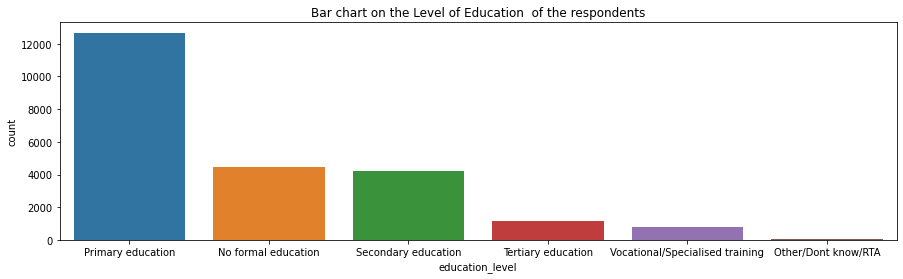

In [29]:
#Displaying the education variable
plt.figure(figsize=(15,4))

sns.countplot(x = financial_df['education_level'].dropna(), order = financial_df['education_level'].value_counts().index);
plt.title('Bar chart on the Level of Education  of the respondents')



Most of the respondents have a primary scholl educations and very few people have Tetriary education

Text(0.5, 1.0, 'Bar chart of the marital status of the population')

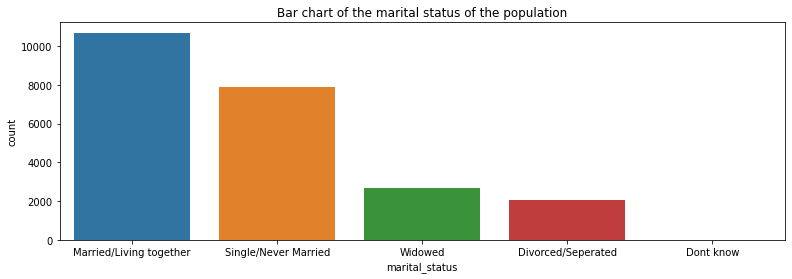

In [30]:
# finding the demographic of people based on the maritial status 
plt.figure(figsize=(13,4))

sns.countplot(x = financial_df['marital_status'].dropna(), order = financial_df['marital_status'].value_counts().index);
plt.title('Bar chart of the marital status of the population')

### Ordianal and Ratio data 

#### Household size

In [74]:
# household size
#mean of Household size
financial_df['household_size'].mean()

3.6942584963954688

The average household size is 3.69 which when rounded off is 4

In [75]:
#mode of household size
financial_df['household_size'].mode()


0    2.0
dtype: float64

In [76]:
# median 
financial_df['household_size'].median()


3.0

In [77]:
# Standard deviation.
financial_df['household_size'].std()

2.2784210534856366

In [78]:
# variance
financial_df['household_size'].var()


5.191202496966597

In [79]:
min_hs = financial_df['household_size'].min()
max_hs = financial_df['household_size'].max()

#range
hs_range = max_hs - min_hs

print('The range of Household size in the financial dataset is: ', hs_range)

The range of Household size in the financial dataset is:  20.0


0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64


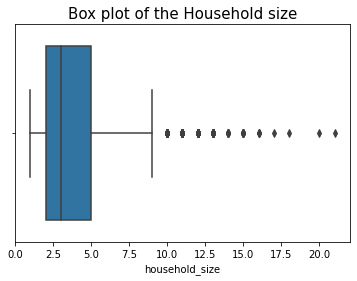

In [80]:
# Quantiles
financial_df['household_size'].quantile([0.25, 0.50, 0.75])
ax = sns.boxplot(x = financial_df['household_size'])
ax.set_title ('Box plot of the Household size', fontsize = 15)
print (financial_df['household_size'].quantile([0.25, 0.50, 0.75]))

In [81]:
# skewness
financial_df['household_size'].skew()

0.978410362939571

In [82]:
# kurtosis
financial_df['household_size'].kurt()


1.160696034089141

Text(0, 0.5, 'Number of poeple')

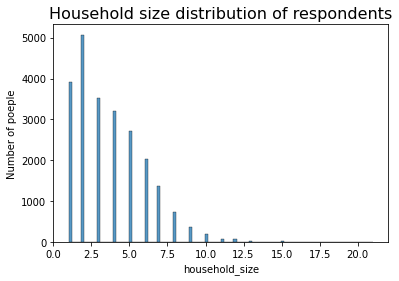

In [83]:
# Histogram of household size distribution.
ax = sns.histplot(financial_df['household_size'])
ax.set_title('Household size distribution of respondents', fontsize = 16)
ax.set_ylabel('Number of poeple') 

#### Age

In [84]:
# Age
#mean age
financial_df['age'].mean()

38.780595605904566

In [85]:
#mode age
financial_df['age'].mode()

0    30.0
dtype: float64

In [86]:
#median age
financial_df['age'].median()

35.0

The Mean age of the respondents is 38.7 which rounds of to 39.

In [87]:
# Age Range 
min_age = financial_df['age'].min()
max_age = financial_df['age'].max()

#range
age_range = max_age - min_age
 
print('The range of age in the financial dataset is: ', age_range)

The range of age in the financial dataset is:  84.0


In [88]:
# The standard deviation of age
financial_df['age'].std()

16.484322096040838

In [89]:
# The variance of age data
financial_df['age'].var()


271.73287496602023

In [90]:
# Quantiles
financial_df['age'].quantile([0.25, 0.50, 0.75])


0.25    26.0
0.50    35.0
0.75    49.0
Name: age, dtype: float64

In [91]:
# Interquantile range
q3 = financial_df['age'].quantile(0.75)
q1 = financial_df['age'].quantile(0.25)  

print('The interquantile range is: ',  q3 - q1)

The interquantile range is:  23.0


In [92]:
# skewness
financial_df['age'].skew()


0.8381743097500266

Text(0, 0.5, 'Number of poeple')

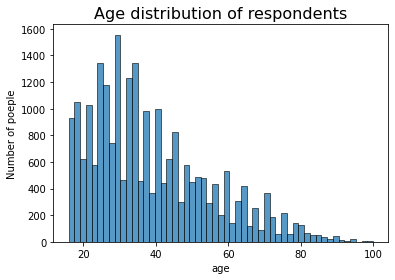

In [93]:
# histogram of the age of respondents
ax = sns.histplot(financial_df['age'])
ax.set_title('Age distribution of respondents', fontsize = 16)
ax.set_ylabel('Number of poeple')
  

## Bivariate Analysis

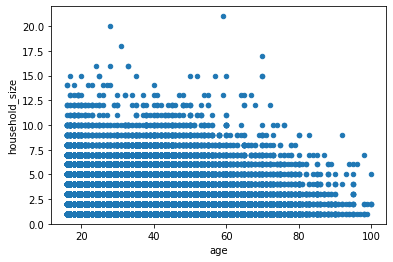

In [73]:
# Scatterplot 
# Relationship between age and bank account ownership
financial_df.plot(x = 'age', y = 'household_size', kind='scatter')

There is no apparent relationship between the age of the respondents and the household size. 

In [94]:
#Confirming for correlation
financial_df["household_size"].corr(financial_df["age"])


-0.11766108234848949

There is a weak negative correlation.

Text(0.5, 1.0, 'Correlation between different features')

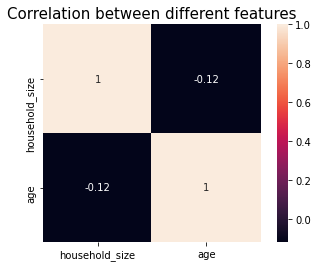

In [53]:
#querying the correlation between age, household size of the respondent
correlation = financial_df.corr()
sns.heatmap(correlation, vmax=1, square=True,annot=True)

plt.title('Correlation between different features', fontsize = 15)


There is no correlation

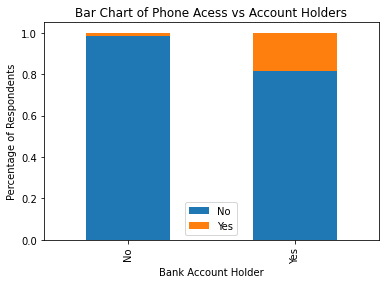

In [54]:
# The percentage of people with bank accounts vs the people with phone access. 

axe = pd.crosstab(financial_df['cell_phone_access'],financial_df['account_holder'])
axe.div(axe.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Bar Chart of Phone Acess vs Account Holders')
plt.xlabel('Bank Account Holder')
plt.ylabel('Percentage of Respondents')
plt.legend(loc = 0)
plt.show()

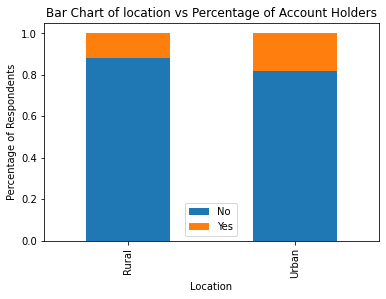

In [55]:
#  Stacked bar chart of type of location and ownership of a bank account 

table=pd.crosstab(financial_df['location_type'],financial_df['account_holder'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Bar Chart of location vs Percentage of Account Holders')
plt.xlabel('Location')
plt.ylabel('Percentage of Respondents')
plt.legend(loc = 0)
plt.show()

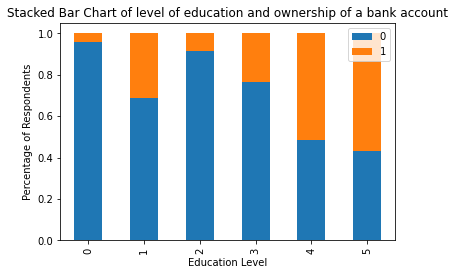

In [99]:
# the percentage of people with bank accounts and their level of education 

edc_table=pd.crosstab(financial_df['education_level'],financial_df['account_holder'])
edc_table.div(edc_table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of level of education and ownership of a bank account')
plt.xlabel('Education Level')
plt.ylabel('Percentage of Respondents')
plt.legend(loc = 0)
plt.show()


Those with no formal education have the highest proportion of respondents without a bank account. The people who have attended vocational/specialized training have the most number of people with bank accounts. They are follewd closely by those with tertiaty edducation.


From the stacked bar greapgh above it is clear to see that the level of education influences the decision to open a bank account. 

## Multivariate Analysis 

For the multivariate Analysis I will use the Principal Component Analysis as a dimensinality reduction tool. There are various steps to using the PCA as a tool. 

In [100]:

# financial_df.columns
from sklearn.preprocessing import LabelEncoder

cols = ['country','location_type', 'account_holder', 'cell_phone_access', 'gender', 'relationship_with_head', 'marital_status',
       'education_level', 'job'  ]
#
# Encode labels of multiple columns at once
#
financial_df[cols]= financial_df[cols].apply(LabelEncoder().fit_transform)
#
# Print head
#
financial_df.head()

,country,year,account_holder,location_type,cell_phone_access,household_size,age,gender,relationship_with_head,marital_status,education_level,job
0,0,2018-01-01,1,0,1,3.0,24.0,0,5,2,3,9
1,0,2018-01-01,0,0,0,5.0,70.0,0,1,4,0,4
2,0,2018-01-01,1,1,1,5.0,26.0,1,3,3,5,9
3,0,2018-01-01,0,0,1,5.0,34.0,0,1,2,2,3
4,0,2018-01-01,0,1,0,8.0,26.0,1,0,3,2,5


In [101]:
# Preprocessing the data

X = financial_df.drop('year', 1)
y = financial_df['cell_phone_access']

In [102]:
# spliting and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [103]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [104]:

# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_


explained_variance

array([0.52974203, 0.47025797])

The first principal component is responsible for 17.95% variance. 
The second principal component causes 15.77% variance in the dataset.

 58.15% of the classification information contained  in the feature set is captured by the first four principal components.

In [105]:
# therefore we can train the data set with up to 4 principal components

In [106]:
#  Using 1 principal component to train our algorithm.

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [66]:
# Step 7: Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [109]:
# Step 8: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



[[ 472  717]
 [  63 3409]]
Accuracy 0.832653936923407


The output with only one component resulted in 82.3% accuracy

In [68]:

# Preprocessing

X = financial_df.drop('year', 1)
y = financial_df['cell_phone_access']

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

# Using 2 principal components to train our algorithm.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Performance Evaluation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



[[ 472  717]
 [  63 3409]]
Accuracy 0.832653936923407


The output with 2 components resulted in 83.2% accuracy as compared to the 82.3% accuracy under 1 component

In [69]:

# Preprocessing

X = financial_df.drop('year', 1)
y = financial_df['cell_phone_access']

# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA

from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Explained Variance Ratio

explained_variance = pca.explained_variance_ratio_

explained_variance

# Using 2 principal components to train our algorithm.

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Performance Evaluation 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))



[[ 472  717]
 [  63 3409]]
Accuracy 0.832653936923407


The output with 2 components resulted in 83.2% accuracy as compared to the 82.2% accuracy under 1 component

# Recommendations for effectively performing multivariate analysis 


In order to build an accurate model, the dimensions of the dataset should be reduced. Factor Analysis, Linear Discriminant Analysis and Principal component analysis can be used to do this. These three techniques will help us determine which variables with be most important in order to build our model later. With the currrent data the reduction tool used is PCA.

# Implimenting the solution


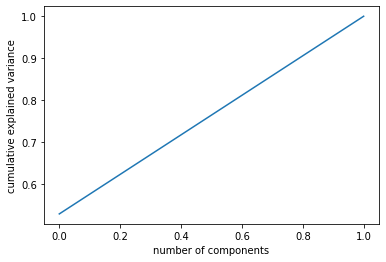

In [70]:
# plotting a Scree plot of cumulative explained variance vs number of components. 

#Explained variance
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


The accuracy and the variance have a positive corelation with the number of components. The optimal number of principal components is four according to the scree plot.

The features in those principal components will offer the best description of the dependent variable.